[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eirasf/GCED-AA2/blob/main/lab3/lab3_parte3.ipynb)
# Práctica 2: Redes neuronales usando Keras
## Parte 3. El API Funcional


## Pre-requisitos: Instalar paquetes

Para esta segunda parte también necesitaremos TensorFlow 2.0 y TensorFlow-Datasets 

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds 

Seguimos empleando el mismo conjunto de datos

In [ ]:
# Cargamos el conjunto de datos
ds = tfds.load('german_credit_numeric', split='train',as_supervised=True)

tamano_lote = 1000

elems = ds.batch(tamano_lote)
lote_entrenamiento = next(iter(elems))

En la parte anterior hemos usado el metodo keras.Sequential() para crear modelos. La API funcional es una forma de crear modelos mas dinámicos que con *Sequential*, nos permite manejar modelos:
1. topología no lineal, 
1. modelos con capas compartidas 
1. modelos con múltiples entradas o salidas.

Se basa en la idea de que un modelo de aprendizaje profundo suele ser un grafo acíclico dirigido (DAG) de capas. La API funcional es un conjunto de herramientas para construir estos grafos de capas, tiene 3 pasos:
1. Definir una capa de entrada
1. Conectar las capas
1. Crear el modelo.

Para ilustrarlo, vamos a considerar un modelo similar a los ya realizados, esto es, un modelo con tres capas.

##Definir una capa de entrada
A diferencia del modelo *Sequential*, debe crear y definir una capa de entrada independiente que especifique la *forma* de los datos de entrada.

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(24,))
inputs.shape

TensorShape([None, 24])

## Conectamos las capas

Las capas se conectan por pares. Al crear cada capa se ha de especificar su entrada usando los paréntesis como notación. Vamos a crear una capa *Dense* que recibe como entrada *inputs*, posteriormente crearemos el resto de las capas para crear un modelo similar al visto en la parte 2 de este laboratorio.

In [ ]:
from tensorflow.keras import layers

h0_size = 5
h1_size = 3
x = layers.Dense(h0_size, activation='sigmoid')(inputs)
#TODO - crear el resto de capas 
x = ...
outputs = ...

Es esta forma de conectar capas una a una lo que le da flexibilidad a la *API funcional*. 

## Crear el modelo

Después de crear todas las capas de su modelo y conectarlas, debe definir el modelo para ello le indicaremos las entradas (*inputs*) y salidas (*outputs*) y además también le podemos asignar un nombre al modelo (*name*).

Al igual que con el modelo *Sequential*, el modelo se puede resumir (*summary*), ajustar, evaluar y usar para hacer predicciones.

In [ ]:
#TODO- definir el modelo 
model = keras.Model(inputs=..., outputs=..., name=...)

#TODO- mostrar un resumen del modelo

Model: "credit_german_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#TODO compilar el modelo


#TODO determinar el numero de epochs
num_epochs =  ...
#TODO - entrenar el modelo 



#TODO - evaluar el modelo
 

Epoch 1/5
1/1 [==============================] - 0s 491ms/step - loss: 1.1068 - precision_1: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 1.0532 - precision_1: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 1.0052 - precision_1: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 0.9622 - precision_1: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 0.9239 - precision_1: 0.0000e+00


Al igual que hicimos en la parte 2 de este laboratorio, también podemos mostrar el gráfico del modelo:

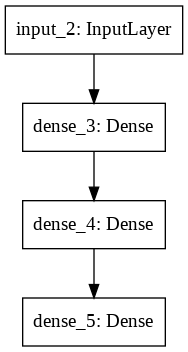

In [ ]:
#TODO: muestra el gráfico del modelo


##Guardando un modelo

Se puede guardar un modelo creado con la API funcional en un solo archivo. Posteriormente, puede volver a crear el mismo modelo a partir de este archivo, incluso si ya no tiene acceso al código que creó el modelo.

Este archivo incluye:

- La arquitectura del modelo
- Los pesos del modelo (que se aprendieron durante el entrenamiento)
- La configuración de entrenamiento del modelo (lo que pasó al 'compilar')
- El optimizador y su estado, si corresponde (permite reiniciar el entrenamiento donde quedó)


In [ ]:
# Guardar el Modelo
model.save('functional_model.tf')
del model
#Si ahora intentaramos hacer algo con el modelo, este ya no existe
#model.summary() # ValueError: NameError: name 'model' is not defined

# Recrea exactamente el mismo modelo desde el archivo
model = keras.models.load_model('functional_model.tf')
#TODO - mostrar un resumen del modelo 

## Verifique que el estado esté guardado
#TODO - evaluar el modelo
 

INFO:tensorflow:Assets written to: functional_model.tf/assets


INFO:tensorflow:Assets written to: functional_model.tf/assets


Model: "credit_german_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 234ms/step - loss: 0.8898 - precision_1: 0.0000e+00



También es importante poder guardar nuestro modelo (o sus pesos) con determinada frequencia. El *Callback ModelCheckpoint* se usa junto con el entrenamiento usando *model.fit()* para guardar un modelo o sus pesos (en un fichero) en algún momento determinado, así el modelo (o los pesos) se pueden recuperar más tarde para continuar el entrenamiento.

Algunos parámetros:
1. *file_path*: ruta para guardar el fichero con el modelo.
1. *save_best_only*: Si está a *True* guarda solo el modelo que ha logrado el "mejor rendimiento" hasta ahora, sino guarda el modelo al final de cada *epoch* sin importar el rendimiento. El rendimiento se evalúa en función de la métrica indicada en el parámetro *monitor*. 
1. *monitor*: el nombre de la métrica que se va a comprobar. Normalmente, las métricas se establecen mediante el método *Model.compile*.
1. *mode*: Indicamos si el objetivo es maximizar (*max*) o minimizar (*min*) la métrica. Existe una opción *auto* que asigna automáticamente *max* o *min* a determinadas métricas.
1. *save_freq*:  La frecuencia a la que debería guardarse. Hay dos opciones,  *save_freq=epoch* guarda al final de cada *epoch* o *save_freq* se iguala a  un número entero que indica un número fijo de lotes de entrenamiento.
1. *save_weights_only*: Si solo se guardan los pesos o se guarda todo el modelo.

Más información: https://keras.io/api/callbacks/model_checkpoint/


In [ ]:
#TODO - indica una ruta para guardar el modelo
checkpoint_filepath = ...
#TODO - configura los distintos parámetros del ModelCheckpoint
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    .....
)

#  Los pesos del modelo se guardan al final de cada epoch, si es el mejor hasta el momento.
#TODO completa los parámetros para el entrenamiento
model.fit(...., callbacks=[model_checkpoint_callback])

# Recuperamos los mejores pesos del modelo
model.load_weights(checkpoint_filepath)

Epoch 1/10
1/1 [==============================] - 1s 768ms/step - loss: 0.8898 - precision_1: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8595 - precision_1: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 0.8325 - precision_1: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8086 - precision_1: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 0.7874 - precision_1: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 0.7685 - precision_1: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7518 - precision_1: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7369 - precision_1: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7237 - precision_1: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 